# Predicting Salaries based on years of experience using Simple Linear Regression

## What is Simple Linear Regression? 
Simple linear regression is a statistical method that helps us in summarizing and studying the relationship between two continuous or interval variables. One of the variable, oftened termes as 'x', is the one that is independent. It is also called as the explanatory or predictor variabe. The other variable, often termed as 'y', is the one which is dependent on 'x'. For this reason, it is called as a dependent, outcome or response variable. We will simply refer 'x' as the independent variable and 'y' as the dependent variable. Finally, the statistical method that we are using is called "linear" regression because it tries to define a linear relationship between x and y. We will go through the following business problem and try to solve it using simple linear regression.

## Business Problem:
We have information of 30 employees. The information is in the form salaries and years of experience of these employees. We want to study the relationship between these two attributes and come up with a model that best defines this relationship. Further, this model will be used to predict salary of an employee when their 'years of experience' is given. 
So, without any wait, lets gets started now!!

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset
data = pd.read_csv('C:/Projects/Datasets/SimpleLinearRegression_Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Creating tow different variables (x and y) out of the dataset
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x
y

array([  39343.,   46205.,   37731.,   43525.,   39891.,   56642.,
         60150.,   54445.,   64445.,   57189.,   63218.,   55794.,
         56957.,   57081.,   61111.,   67938.,   66029.,   83088.,
         81363.,   93940.,   91738.,   98273.,  101302.,  113812.,
        109431.,  105582.,  116969.,  112635.,  122391.,  121872.])

In [4]:
# Lets see if we got that right
print(x[0:5])
print(type(x))

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]]
<class 'numpy.ndarray'>


We can see that variable, x, has all the data points that refer to years of experience of the employees. This is the independent variable. *(This variable is a numpy array)*

In [5]:
print(y[0:5])
print(type(y))

[ 39343.  46205.  37731.  43525.  39891.]
<class 'numpy.ndarray'>


We can see that variable, y, has all the data points that refer to salaries of the employees . This is the dependent variable. *(This variable is a numpy array)*

## Visualizing the Employee data
Lets plot the data that we've got and analyse the same.

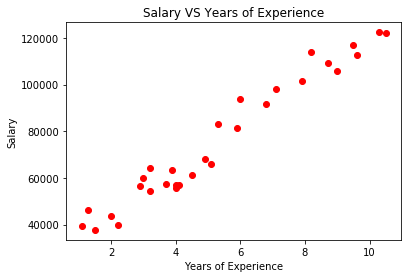

In [6]:
plt.scatter(x, y, color = 'red')
plt.title('Salary VS Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

We can see that there is a positive linear relationship between the years of experience and salary. Salary keeps increasing with years of experience. This sounds logical enough as one would expect to get more salary when they have 10 years of experience compared to when they have 2. Thus, simple linear regression would help us determine this linear relation.

*Note: Our dataset is small and not that complex. More importantly, It is clean, meaning that we don't have to pre-process our data.*

## Splitting dataset into train and test data sets
We generally split our data set into 2 parts. One is the training set which is used to analyze the relationship between the variables and build a model. The other one is the test set which is used to test our model and assess accuracy.

Now, to split our dataset, we'll be making use of a function 'train_test_split'. This function is a part of the library sklearn.cross_validation. So let's import this function and then use it to split our dataset.

In [15]:
#Splitting dataset into train and test data sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 1/3)

Our train and test datasets are ready now. Now, lets proceed with buiding the model based on the training datased.
*Note: We will not be scaling(standardizing/normalizing) our data as the linear regression class, that we'll be using, does that implicitly*

## Building the Linear Regression Model
There's a class within the library sklearn.linear_model by the name "LinearRegression". This is the class that we'll be using to build our class. Let's now import the same.

In [8]:
# Importing LinearRegression class
from sklearn.linear_model import LinearRegression

Let's now instantiate our "regressor" object that we'll use to study the relationship between x and y(to be specific, x_train and y_train)

In [9]:
# Creating the regressor
regressor = LinearRegression()

In [10]:
# Fitting the regressor to x_train and y_train
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, we have fit our regressor to the training data set. Behind the scenes, what just happened is, the fit() method analyzed the x_train and y_train and established a linear relationship between them. Basically it defined the relationship in the form of a function of the form y = mx + b. This is a linear function having slope m. Here m and b are decided solely by the algorithm which involves mathematical calculations. Now that we have our model ready, we can visualize the linear model against our training set.

## Predict Salary based on our model
Lets predict the salary when years of experience is, say 15 years.

In [11]:
salary_15years = regressor.predict(15)
salary_15years

array([ 170781.46125444])

Lets predict the salary when years of experience is, say 2 years this time.

In [12]:
salary_2years = regressor.predict(2)
salary_2years

array([ 43450.33406464])

We can see that the salary corresponding to 15 years of experience is much larger (around USD 170000) than that of the one corresponding to 2 years of experience (around USD 43000). This obviosuly makes sense.

## Visualizing the model against training set
Here, we'll visualize the linear relation, that our model came up with, against the training data set.

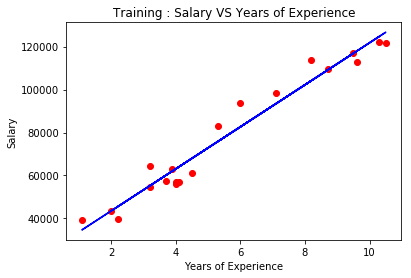

In [13]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Training : Salary VS Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Voila! there we have our regressor plotted against the training data set. Clearly, we can see that the regressor defined a linear relationship between x(years of experience) and y(salary). Also, this makes sense, as an employee with 5 years of experience would earn less than the one working for over 15 years. Next, lets test our model how accurate it is while predicting the salaries of the employees in the test data set

## Visualizing the model against test set
Here, we'll visualize the salaries predicted by our model and the actual salaries of the employees in the test set.
Let's start plotting.

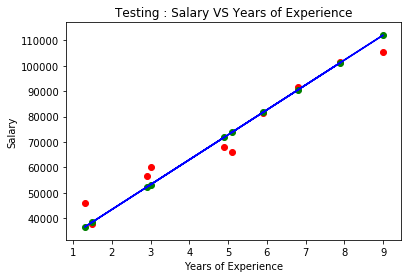

In [14]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.scatter(x_test, regressor.predict(x_test), color = 'green')
plt.title('Testing : Salary VS Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In the above plot, green dots represent the predicted values wheareas the red dots represent the actual values. We can see that there is not much difference between the actual and predicted values. Thus, our model was quite successful in estamiting salaries of the employess and that's, by the way, is cool. :)

## Conclusion
We successfully created a linear regression model for our dataset that helped us establish a relation between the salary and number of years of experience of employees. This problem, in itself was a linear problem because it is generally known that the salary grows linearly with years of experience. We were also able to predict the salaries of employees having knowledge about their number of years of experience.